<a href="https://colab.research.google.com/github/armandoordonez/eda_couse/blob/main/basic_clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img height="45px" src="https://drive.google.com/uc?id=1aJx1i5ecv6L6R5zUqK_ry6vuDnBDmprd"align="left" hspace="10px" vspace="0px"></p>

<h1>Flujo de analítica </h1>
<br>

*Tiempo aproximado:* ***15 minutos***

In [122]:
# Importamos las bibliotecas necesarias

# bibliotecas para manipulación de datos
import pandas as pd

# bibliotecas para preprocesamiento
from sklearn.model_selection import train_test_split
# bibliotecas para modelado
from sklearn.ensemble import RandomForestClassifier

# bibliotecas para evaluación
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# bibliotecas para visualización
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
# Paso 1: Cargar el archivo CSV desde una URL en un DataFrame de Pandas 
# Ruta del archivo CSV
ruta_archivo = 'https://raw.githubusercontent.com/armandoordonez/eda_couse/main/data/prediccion_prestamo_train.csv'  # Reemplaza con la ruta de tu archivo CSV

# Cargar el archivo CSV en un DataFrame de Pandas 
data = pd.read_csv(ruta_archivo)

In [124]:
# Paso 2: Análisis Exploratorio de datos simplificado

# Puedes imprimir información básica sobre el conjunto de datos

print("Información del conjunto de datos:")
print(data.info())


Información del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       614 non-null    object 
 1   Genero                   601 non-null    object 
 2   Married                  611 non-null    object 
 3   dependientes             599 non-null    object 
 4    educacion               614 non-null    object 
 5    autoempleado            582 non-null    object 
 6    ingresos_solicitante    614 non-null    int64  
 7    ingresos_cosolicitante  614 non-null    float64
 8    monto_prestamo          592 non-null    float64
 9    plazo_prestamo          600 non-null    float64
 10   historial_crediticio    564 non-null    float64
 11   area_propiedad          614 non-null    object 
 12   estado_prestamo         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usa

In [125]:
# Visualizar las primeras filas del conjunto de datos

print("\nPrimeras filas del conjunto de datos:")
data.head(5)


Primeras filas del conjunto de datos:


,ID,Genero,Married,dependientes,educacion,autoempleado,ingresos_solicitante,ingresos_cosolicitante,monto_prestamo,plazo_prestamo,historial_crediticio,area_propiedad,estado_prestamo
0,LP001002,Hombre,No,0,Graduado,No,5849,0.0,NaN,360.0,1.0,Urbano,Y
1,LP001003,Hombre,Si,1,Graduado,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Hombre,Si,0,Graduado,Si,3000,0.0,66.0,360.0,1.0,Urbano,Y
3,LP001006,Hombre,Si,0,Not Graduado,No,2583,2358.0,120.0,360.0,1.0,Urbano,Y
4,LP001008,Hombre,No,0,Graduado,No,6000,0.0,141.0,360.0,1.0,Urbano,Y


In [126]:
# Mostrar estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(data.describe())
# 


Estadísticas descriptivas:
       ingresos_solicitante  ingresos_cosolicitante  monto_prestamo  \
count            614.000000              614.000000      592.000000   
mean            5403.459283             1621.245798      146.412162   
std             6109.041673             2926.248369       85.587325   
min              150.000000                0.000000        9.000000   
25%             2877.500000                0.000000      100.000000   
50%             3812.500000             1188.500000      128.000000   
75%             5795.000000             2297.250000      168.000000   
max            81000.000000            41667.000000      700.000000   

       plazo_prestamo  historial_crediticio  
count       600.00000            564.000000  
mean        342.00000              0.842199  
std          65.12041              0.364878  
min          12.00000              0.000000  
25%         360.00000              1.000000  
50%         360.00000              1.000000  
75%       

In [127]:
# Paso 3: Preprocesamiento de datos
 
# Algo de limpieza de datos
# eliminamos los nulos
data = data.dropna()

In [128]:
# mostramos nuevemamente la información general del dataset 
# para verificar que no hayan nulos

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       480 non-null    object 
 1   Genero                   480 non-null    object 
 2   Married                  480 non-null    object 
 3   dependientes             480 non-null    object 
 4    educacion               480 non-null    object 
 5    autoempleado            480 non-null    object 
 6    ingresos_solicitante    480 non-null    int64  
 7    ingresos_cosolicitante  480 non-null    float64
 8    monto_prestamo          480 non-null    float64
 9    plazo_prestamo          480 non-null    float64
 10   historial_crediticio    480 non-null    float64
 11   area_propiedad          480 non-null    object 
 12   estado_prestamo         480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB
None


In [129]:
# Paso 3: Dividir el conjunto de datos en características (X) y etiquetas (y)
# Características
# Seleccionamos las columnas de características
# ingresos_solicitante, ingresos_cosolicitante y monto_prestamo como características para el modelo
# y la columna estado_prestamo como etiqueta para predecir

X = data[[" ingresos_solicitante", " ingresos_cosolicitante", " monto_prestamo"]]
y = data[' estado_prestamo']

In [130]:
# mostramos la información de las características   
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0    ingresos_solicitante    480 non-null    int64  
 1    ingresos_cosolicitante  480 non-null    float64
 2    monto_prestamo          480 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 15.0 KB
None


In [132]:
# aqui se muestra la información de las etiquetas
# que en este caso es la columna 'estado_prestamo'  es la que queremos predecir
# en este caso es una variable binaria:  1 si el prestamo fue aprobado y 0 si no fue aprobado

print(y.value_counts())

data[' estado_prestamo'] = data[' estado_prestamo'].replace({'Y': 1, 'N': 0})
data[' estado_prestamo'] = data[' estado_prestamo'].astype(int)

 estado_prestamo
Y    332
N    148
Name: count, dtype: int64


In [133]:
# Paso 4: Dividir el conjunto de datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [134]:

# Paso 4: Entrenar un modelo de clasificación (usando Random Forest como ejemplo)
# Crear un modelo de clasificación de bosque aleatorio
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)


Precisión del modelo: 0.62


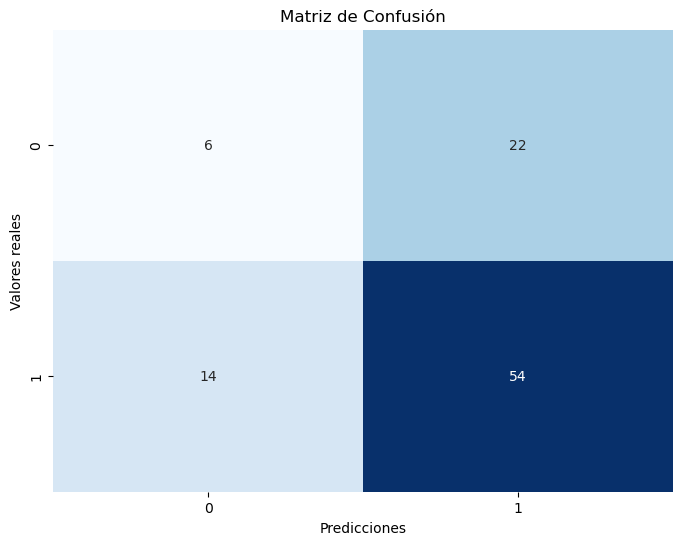


Informe de Clasificación:
              precision    recall  f1-score   support

           N       0.30      0.21      0.25        28
           Y       0.71      0.79      0.75        68

    accuracy                           0.62        96
   macro avg       0.51      0.50      0.50        96
weighted avg       0.59      0.62      0.60        96



In [135]:
# Paso 5: Evaluación del modelo
y_pred = modelo.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo: {precision:.2f}")

# Mostrar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

# Mostrar el informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred)
print("\nInforme de Clasificación:")
print(informe_clasificacion)

In [136]:
# Paso 6: Guardar el modelo entrenado en un archivo para su uso posterior
# Guardar el modelo en un archivo usando pickle
import pickle

with open('modelo_prestamo.pkl', 'wb') as archivo_salida:
    pickle.dump(modelo, archivo_salida)

# Verificar que se haya creado el modelo en el sistema de archivos

In [137]:

# Paso 7: Cargar el modelo desde el archivo y hacer una predicción
with open('modelo_prestamo.pkl', 'rb') as archivo_entrada:
    modelo_cargado = pickle.load(archivo_entrada)

# Crear un nuevo ejemplo de datos
nuevo_ejemplo = pd.DataFrame({
    ' ingresos_solicitante': [5000],
    ' ingresos_cosolicitante': [0],
    ' monto_prestamo': [300]
})

# Hacer una predicción usando el modelo cargado
prediccion = modelo_cargado.predict(nuevo_ejemplo)
print("\nPredicción:", prediccion)

# Modifique el valor de los ingresos del solicitante a 1000 y vuelva a ejecutar la celda anterior para ver cómo cambia la predicción.




Predicción: ['Y']


In [1]:
# Ejercicios a realizar:

# 1. Utiliza otras variables del conjunto de datos para predecir el prestamo
# 2. Utliza otro algoritmo y compara los resultados

## Ejercicio 1

In [139]:
# Convertir las columnas 'educacion' y 'autoempleado' a variables binarias
# 'educacion': 1 si es Graduado y 0 si es Not Graduado
# 'autoempleado': 1 si es autoempleado y 0 si no es autoempleado

data[' educacion'] = data[' educacion'].replace({'Graduado': 1, 'Not Graduado': 0})
data[' educacion'] = data[' educacion'].astype(int)

data[' autoempleado'] = data[' autoempleado'].replace({'Si': 1, 'No': 0})
data[' autoempleado'] = data[' autoempleado'].astype(int)

In [140]:
# Dividir el conjunto de datos en características (X) y etiquetas (y)
# Características
# Seleccionamos las columnas de características
# educacion, autoempleado e historial_crediticio como características para el modelo
# y la columna estado_prestamo como etiqueta para predecir

X = data[[' educacion', ' autoempleado', ' historial_crediticio']]
y = data[' estado_prestamo']

In [142]:
# Dividir el conjunto de datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [143]:
# Entrenar un modelo de clasificación (usando Random Forest como ejemplo)
# Crear un modelo de clasificación de bosque aleatorio
modelo = RandomForestClassifier(random_state = 42)
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)


Precisión del modelo: 0.82


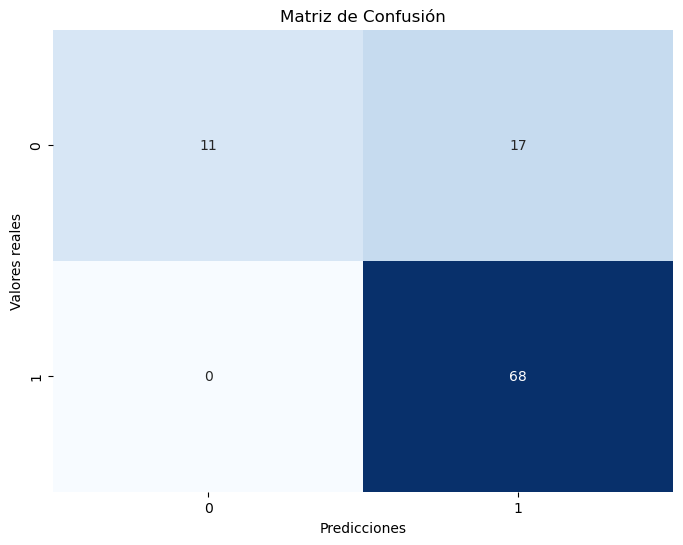


Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.39      0.56        28
           1       0.80      1.00      0.89        68

    accuracy                           0.82        96
   macro avg       0.90      0.70      0.73        96
weighted avg       0.86      0.82      0.79        96



In [144]:
# Evaluación del modelo
y_pred = modelo.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print(f'\nPrecisión del modelo: {precision:.2f}')

# Mostrar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 6))
sns.heatmap(matriz_confusion, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

# Mostrar el informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred)
print('\nInforme de Clasificación:')
print(informe_clasificacion)

In [145]:
# Guardar el modelo entrenado en un archivo para su uso posterior
# Guardar el modelo en un archivo usando pickle
import pickle

with open('modelo_prestamo_E1.pkl', 'wb') as archivo_salida:
    pickle.dump(modelo, archivo_salida)

# Verificar que se haya creado el modelo en el sistema de archivos

In [146]:
# Cargar el modelo desde el archivo y hacer una predicción
with open('modelo_prestamo_E1.pkl', 'rb') as archivo_entrada:
    modelo_cargado = pickle.load(archivo_entrada)

# Crear un nuevo ejemplo de datos
nuevo_ejemplo = pd.DataFrame({
    ' educacion': [0],
    ' autoempleado': [1],
    ' historial_crediticio': [1.0]
})

# Hacer una predicción usando el modelo cargado
prediccion = modelo_cargado.predict(nuevo_ejemplo)
print('\nPredicción:', prediccion)


Predicción: [1]


## Ejercicio 2

In [147]:
# Convertir las columnas 'educacion' y 'autoempleado' a variables binarias
# 'educacion': 1 si es Graduado y 0 si es Not Graduado
# 'autoempleado': 1 si es autoempleado y 0 si no es autoempleado

data[' educacion'] = data[' educacion'].replace({'Graduado': 1, 'Not Graduado': 0})
data[' educacion'] = data[' educacion'].astype(int)

data[' autoempleado'] = data[' autoempleado'].replace({'Si': 1, 'No': 0})
data[' autoempleado'] = data[' autoempleado'].astype(int)

In [148]:
# Dividir el conjunto de datos en características (X) y etiquetas (y)
# Características
# Seleccionamos las columnas de características
# educacion, autoempleado e historial_crediticio como características para el modelo
# y la columna estado_prestamo como etiqueta para predecir

X = data[[' educacion', ' autoempleado', ' historial_crediticio']]
y = data[' estado_prestamo']

In [149]:
# Dividir el conjunto de datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [150]:
# Entrenar un modelo de clasificación (usando Gradient Boosting como ejemplo)
# Crear un modelo de clasificación gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

modelo = GradientBoostingClassifier(random_state = 42)
modelo.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)


Precisión del modelo: 0.82


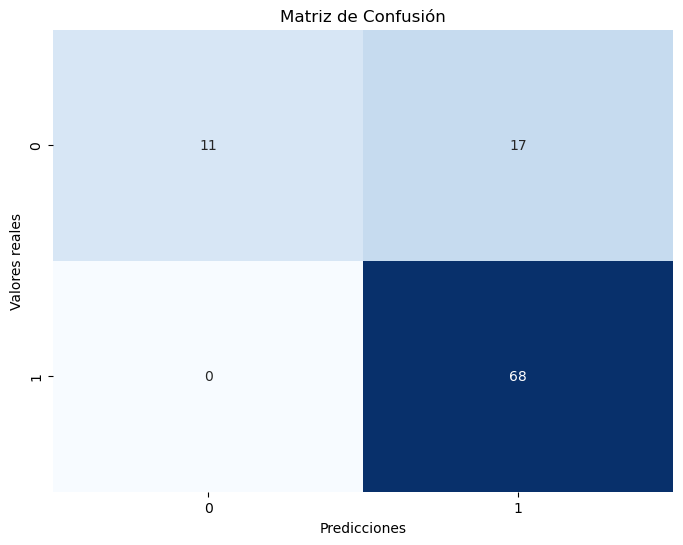


Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.39      0.56        28
           1       0.80      1.00      0.89        68

    accuracy                           0.82        96
   macro avg       0.90      0.70      0.73        96
weighted avg       0.86      0.82      0.79        96



In [151]:
# Evaluación del modelo
y_pred = modelo.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print(f'\nPrecisión del modelo: {precision:.2f}')

# Mostrar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 6))
sns.heatmap(matriz_confusion, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

# Mostrar el informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred)
print('\nInforme de Clasificación:')
print(informe_clasificacion)

In [152]:
# Guardar el modelo entrenado en un archivo para su uso posterior
# Guardar el modelo en un archivo usando pickle
import pickle

with open('modelo_prestamo_E2.pkl', 'wb') as archivo_salida:
    pickle.dump(modelo, archivo_salida)

# Verificar que se haya creado el modelo en el sistema de archivos

In [153]:
# Cargar el modelo desde el archivo y hacer una predicción
with open('modelo_prestamo_E2.pkl', 'rb') as archivo_entrada:
    modelo_cargado = pickle.load(archivo_entrada)

# Crear un nuevo ejemplo de datos
nuevo_ejemplo = pd.DataFrame({
    ' educacion': [0],
    ' autoempleado': [1],
    ' historial_crediticio': [1.0]
})

# Hacer una predicción usando el modelo cargado
prediccion = modelo_cargado.predict(nuevo_ejemplo)
print('\nPredicción:', prediccion)


Predicción: [1]
